In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [4]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler()
scaled_training = sc.fit_transform(train_set)

In [8]:
x_train = []

In [9]:
y_train = []

In [10]:
for i in range(10,1258):
    x_train.append(scaled_training[i-10:i,0])
    y_train.append(scaled_training[i,0])

In [11]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(1248, 10)

In [13]:
y_train.shape

(1248,)

In [14]:
print(x_train.ndim, y_train.ndim)

2 1


In [15]:
x_train = np.reshape(x_train,(1248, 10,1))

In [16]:
x_train.shape

(1248, 10, 1)

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(LSTM(units = 10, return_sequences = True, input_shape = (10,1)))

In [21]:
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units=1))
model.compile("rmsprop",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
39/39 [==============================] - 5s 10ms/step - loss: 0.0975
Epoch 2/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 3/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 4/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 5/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 6/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.0130
Epoch 7/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 8/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 9/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 10/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 11/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 12/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 13/1000
39/3

39/39 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 101/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 102/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 103/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 104/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 105/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 106/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 107/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 108/1000
39/39 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 109/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 110/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 111/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 112/1

39/39 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 198/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 199/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 200/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 201/1000
39/39 [==============================] - 0s 13ms/step - loss: 0.0034
Epoch 202/1000
39/39 [==============================] - 1s 17ms/step - loss: 0.0030
Epoch 203/1000
39/39 [==============================] - 1s 16ms/step - loss: 0.0030
Epoch 204/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0031
Epoch 205/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 206/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 207/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0032
Epoch 208/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 2

39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 294/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 295/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 296/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 297/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 298/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 299/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 300/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 301/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0027
Epoch 302/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 303/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 304/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 3

39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 391/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 392/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 393/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 394/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 395/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 396/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 397/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 398/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 399/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 400/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 401/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 4

39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 488/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 489/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 490/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 491/1000
39/39 [==============================] - 4s 104ms/step - loss: 0.0028 1s - loss: 0.00 - ETA: 
Epoch 492/1000
39/39 [==============================] - 2s 38ms/step - loss: 0.0028
Epoch 493/1000
39/39 [==============================] - 1s 22ms/step - loss: 0.0027
Epoch 494/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0029: 0s - loss
Epoch 495/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 496/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 497/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 498/1000
39/39 [==============================] - 

39/39 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 584/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 585/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 586/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 587/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 588/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 589/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0028: 0s - loss: 0.
Epoch 590/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0029
Epoch 591/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 592/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 593/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0027
Epoch 594/1000
39/39 [==============================] - 1s 20ms/step - loss:

39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 680/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0028
Epoch 681/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 682/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0029: 0s - lo
Epoch 683/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0027
Epoch 684/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 685/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0028
Epoch 686/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 687/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0028
Epoch 688/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 689/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 690/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.002

39/39 [==============================] - 1s 21ms/step - loss: 0.0029
Epoch 776/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 777/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 778/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 779/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025: 0s - los - ETA: 0s - loss: 0.00
Epoch 780/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0026: 0s - loss: 
Epoch 781/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 782/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 783/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 784/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 785/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0024
Epoch 786/1000
39/39 [=======================

39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 872/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 873/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 874/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 875/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 876/1000
39/39 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 877/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0023
Epoch 878/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 879/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0024: 0s - loss
Epoch 880/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 881/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 882/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0

39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 967/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 968/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 969/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0024
Epoch 970/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0027
Epoch 971/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 972/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 973/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 974/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 975/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0023
Epoch 976/1000
39/39 [==============================] - 1s 21ms/step - loss: 0.0023
Epoch 977/1000
39/39 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 9

In [23]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [24]:
y_test = dataset_test.iloc[:,1:2]

In [25]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0)

In [26]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-10:].values

In [29]:
len(dataset_test)+10

30

In [27]:
inputs = inputs.reshape(-1,1)

In [28]:
inputs = sc.fit_transform(inputs)

In [30]:
x_test = []
for i in range(10,30):
    x_test.append(inputs[i-10:i,0])

In [31]:
x_test = np.array(x_test)

In [32]:
x_test.shape

(20, 10)

In [33]:
x_test = np.reshape(x_test,(20,10,1))

In [34]:
ypred = model.predict(x_test)

In [35]:
ypred = sc.inverse_transform(ypred)

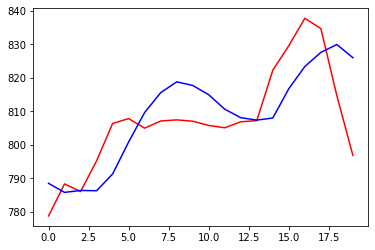

In [36]:
plt.plot(y_test, color="red",label="actual stock price")
plt.plot(ypred, color="blue",label="predicted stock price")
plt.show()

In [37]:
data=[]
for i in range(10,20):
    data.append(i)
data = np.array(data)
data = data.reshape(-1,1)
data = np.reshape(data,(1,10,1))
yp = model.predict(data)

In [38]:
yp = sc.inverse_transform(yp)
print(yp)

[[831.9915]]


In [40]:
test =  [343,456,756,678,786,343,456,756,678,786]
test = np.array(test) 
test = test.reshape(-1,1)
test = np.reshape(test, (1,10,1))
yp = model.predict (test)
yp = sc.inverse_transform(yp)
print(yp)

[[832.056]]
